In [ ]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

!git clone https://github.com/flexibo/DL2

keras:  2.3.0-tf


fatal: destination path 'DL2' already exists and is not an empty directory.


In [ ]:
# Load the emoji_dictionary
import pandas as pd
df = pd.read_csv('/content/DL2/mapping.csv', delimiter=',')
emoji_dictionary = df.loc[:,'emoticons'].to_dict()
print(emoji_dictionary)
print('A total of: ', len(emoji_dictionary), 'Emoji Icons')

{0: '😍', 1: '😂', 2: '📷', 3: '🔥', 4: '❤'}
A total of:  5 Emoji Icons


In [ ]:
# load the dataset
dat = pd.read_csv('/content/DL2/dataset.csv', delimiter=',')
texts = dat.loc[:,'TEXT'].values 
labels = dat.loc[:,'Label'].values

In [ ]:
print(texts)

['Been friends since 7th grade. Look at us now we all following our dreams doing what we love and…\n'
 'This is what it looks like when someone loves you unconditionally oh Puppy Brother. #htx…\n'
 "RT @user this white family was invited to a Black barbecue and i've never laughed so hard in my life\n"
 ...
 'Meet Olive. Our new #GreatDane ️ ️ ️#DogsOfDenver #Dane #DogLove @ Dream Denver\n'
 '"I talk gray, I don\'t keep it white and black" : @user @ Three Rivers Park District -…\n'
 'When his baby comes to visit. ️#cheflife #chefdogs #chanceboudreaux #bloodhoundpuppy…\n']


In [ ]:
import string 
# lower case and remove punctuation
for i in range(len(texts)):
  texts[i] = texts[i].lower()
  no_punct = ''
  for char in texts[i]:
    if char.isalpha() or char.isnumeric() or char == ' ':
      no_punct = no_punct + char
  texts[i] = no_punct

In [ ]:
print(texts)
print(texts.shape)

['been friends since 7th grade look at us now we all following our dreams doing what we love and'
 'this is what it looks like when someone loves you unconditionally oh puppy brother htx'
 'rt user this white family was invited to a black barbecue and ive never laughed so hard in my life'
 ...
 'meet olive our new greatdane   dogsofdenver dane doglove  dream denver'
 'i talk gray i dont keep it white and black  user  three rivers park district '
 'when his baby comes to visit cheflife chefdogs chanceboudreaux bloodhoundpuppy']
(42546,)


In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
for i in range(len(texts)):
  texts[i] = tknzr.tokenize(texts[i])

In [ ]:
stopwords_and_unwanted = ['also','user', 'hey', 'ill', 'im', 'ive', 'go', 'us', 'since', 'oh', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'rt', '…']
for i in range(len(texts)):
  lel = []
  for j in texts[i]:
    if j not in stopwords_and_unwanted and j not in lel:
      lel.append(j)

  texts[i] = lel

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
print(texts[0:10])

[list(['friends', '7th', 'grade', 'look', 'following', 'dreams', 'love'])
 list(['looks', 'like', 'someone', 'loves', 'unconditionally', 'puppy', 'brother', 'htx'])
 list(['white', 'family', 'invited', 'black', 'barbecue', 'never', 'laughed', 'hard', 'life'])
 list(['westenders', 'lazznation', 'weston', 'toronto'])
 list(['maxwell', 'heads', 'home', 'summa', 'akron', 'city', 'hospital'])
 list(['story', 'saturday', '136', 'collins', 'ave', 'miami', 'beach', 'fl', '33139', 'ladies', 'contact', 'join'])
 list(['dragged', 'loving', 'husband', 'live', 'episode', 'hellofromthemagictavern', 'javits', 'center'])
 list(['aladdinsf', 'shining', 'shimmering', 'splendid', 'talented', 'cast', 'shn', 'broadway', 'san'])
 list(['family', 'wetnwild', 'las', 'vegas'])
 list(['hit', 'ready', 'ride', 'harley', 'davidson', 'tons', 'cities', 'hawaii'])]


In [ ]:
# Check the maximum length of texts
max_len = -1
for example in texts:
    if len(example) > max_len:
        max_len = len(example)
        
print('the maximum length of the text inputs is ', max_len)

the maximum length of the text inputs is  18


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000  # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)
y = np.asarray(labels)

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y.shape)

Found 50367 unique tokens.
Shape of data tensor: (42546, 18)
Shape of label tensor: (42546,)


In [ ]:
print(y)

[0 1 1 ... 4 2 4]


In [ ]:
print(tokenizer.word_index)

{'love': 1, 'new': 2, 'amp': 3, 'happy': 4, 'day': 5, 'night': 6, 'one': 7, 'today': 8, 'time': 9, 'best': 10, 'like': 11, 'park': 12, 'birthday': 13, 'beautiful': 14, 'last': 15, 'got': 16, 'get': 17, 'york': 18, 'california': 19, 'good': 20, 'family': 21, 'see': 22, 'little': 23, 'beach': 24, 'great': 25, 'much': 26, 'city': 27, 'thank': 28, 'thanks': 29, 'back': 30, 'life': 31, 'favorite': 32, 'center': 33, 'first': 34, 'university': 35, 'amazing': 36, 'tonight': 37, 'cant': 38, 'always': 39, 'girl': 40, 'home': 41, 'look': 42, 'dont': 43, 'fun': 44, 'friends': 45, 'texas': 46, 'lol': 47, 'nyc': 48, 'school': 49, 'heart': 50, 'christmas': 51, 'know': 52, 'morning': 53, 'people': 54, 'weekend': 55, '2017': 56, 'baby': 57, 'come': 58, 'repost': 59, 'san': 60, 'high': 61, 'two': 62, 'los': 63, 'world': 64, 'year': 65, 'show': 66, '2': 67, 'right': 68, 'state': 69, 'friend': 70, 'florida': 71, 'lake': 72, 'place': 73, 'ever': 74, 'fire': 75, 'lit': 76, 'house': 77, 'big': 78, 'still': 7

In [ ]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 31)
# Refer the report Appendix
# Please enter the random_state assigned to your group

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM 
from tensorflow.keras import layers

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(max_words, 8, input_length=max_len))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Flatten())

# We add the classifier on top
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2,
                    validation_split=0.2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 18, 8)             80000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 18, 32)            5248      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
flatten_11 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 165       
Total params: 93,733
Trainable params: 93,733
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13614/13614 [==============================] - 116s 8ms/step - loss: 1.3286 - acc: 0.4636 - val_loss: 1.

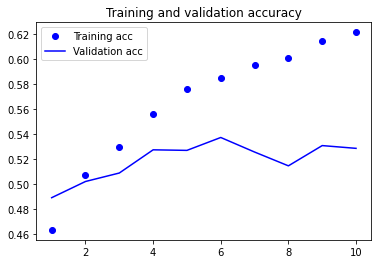

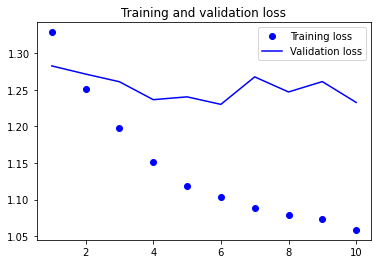

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()